In [1]:
! export SKLEARN_ALLOW_DEPRECATED_SKLEARN_PACKAGE_INSTALL=True && pip install caimcaim pandas scikit-learn xgboost

In [2]:
#!pip install gdown

In [3]:
import pandas as pd
from IPython.display import  clear_output
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif
import math
from collections import defaultdict
from sklearn.metrics import accuracy_score
from scipy.io import loadmat
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_validate
from caimcaim import CAIMD
import time
from sklearn.metrics import log_loss

In [4]:
def entropy(X):
    unique, count = np.unique(X, return_counts=True, axis=0)
    prob = count / len(X)
    en = np.sum((-1) * prob * np.log2(prob))
    return en

In [5]:
# Joint Entropy H(x,y)
def joint_entropy(X, Y):
    XY = np.c_[X, Y]
    return entropy(XY)


In [6]:
# Joint Entropy H(x,y,z)
def joint_entropy_3(X, Y, Z):
    XYZ = np.c_[X, Y, Z]
    return entropy(XYZ)

In [7]:
# Conditional Entropy X given Y; H(x|y)
def conditional_entropy(X, Y):
    return joint_entropy(X, Y) - entropy(Y)

In [8]:
def ret_joint_entropy3(x,y):
    if(x<y):
        return joint_entropy_list3[x][y]
    else:
        return joint_entropy_list3[y][x]

In [9]:

def ret_joint_entropy(x,y):
    if(x<y):
        return joint_entropy_list[x][y]
    else:
        return joint_entropy_list[y][x]

In [10]:
#### H(x,y|z)
def conditional_join_entropy(x, y, z):
    if x == length - 1:
        return ret_joint_entropy3(y, z) - entropy_list[z];
    elif y == length - 1:
        return ret_joint_entropy3(x, z) - entropy_list[z];
    else:
        return ret_joint_entropy3(x, y) - entropy_list[z];

In [11]:
##### I(x,y)
def get_mutual_info(x, y):
    return entropy_list[x] + entropy_list[y] - ret_joint_entropy(x, y);

In [12]:
########## I(x,y|z)
def conditional_mutual_info(x, y, z):
    cxz = ret_joint_entropy(x, z)-entropy_list[z];
    cyz = ret_joint_entropy(y, z)-entropy_list[z];
    return cxz + cyz - conditional_join_entropy(x, y, z)


In [13]:
def feature_name(arr):
    name = "{";
    for i in range(len(arr)):
        if i > 0:
            name = name + ", ";

        name = name + feature_list[arr[i]]

    name = name + "}"
    return name

In [14]:
def feature_array(arr):
    name = []
    for i in range(len(arr)):
        name.append(feature_list[arr[i]])
    return name

In [15]:
def return_corelation(x, y):
    size = len(x);
    ux = x.sum() / size
    uy = y.sum() / size

    xmux = x - ux
    ymuy = y - uy

    xmuxymuy = xmux * ymuy;

    cov = xmuxymuy.sum() / (size - 1)

    var_x = xmux * xmux
    var_x = var_x.sum() / (size - 1)

    var_y = ymuy * ymuy
    var_y = var_y.sum() / (size - 1)

    sd_x = math.sqrt(var_x)
    sd_y = math.sqrt(var_y)

    co_xy = cov / (sd_x * sd_y)

    return co_xy

In [16]:
def selection_accurecy_svm(selected_features):
    x = data.iloc[:, features]
    y = data['class'];

    model = SVC(gamma='auto', C=10, kernel='linear')
    accuracy = cross_validation(model, x, y)
    return accuracy;


In [17]:
def selection_accurecy_dt(selected_features):

    x = data.iloc[:, features]
    y = data['class'];

    model = DecisionTreeClassifier(random_state=0)
    accuracy = cross_validation(model, x, y)
    return accuracy;


In [18]:
def selection_accurecy_KNN(selected_features):

  x = data.iloc[:, features]
  y = data['class'];

  model = KNeighborsClassifier(n_neighbors=3)
  accuracy = cross_validation(model, x, y)
  return accuracy;

  return accuracy_score(y_test, predictions)


In [19]:
def selection_accurecy_nb(selected_features):

  x = data.iloc[:, features]
  y = data['class'];

  model = GaussianNB()

  accuracy = cross_validation(model, x, y)
  return accuracy;

In [20]:
def selection_accurecy_xgb(selected_features):
    x = data[selected_features];
    y = data['class'];

    model = XGBClassifier()

    accuracy = cross_validation(model, x, y)
    return accuracy;

In [21]:
def selection_accurecy_rfc(selected_features):

  x = data.iloc[:, features]
  y = data['class'];

  model = RandomForestClassifier(random_state=42)

  accuracy = cross_validation(model, x, y)
  return accuracy;

In [22]:
def cross_validation(model, _X, _y):
    _scoring = ['accuracy', 'precision', 'recall', 'test_score']
    results = cross_validate(estimator=model,
                             X=_X,
                             y=_y,
                             cv=10,
                             # scoring=_scoring,
                             return_train_score=True)

    return results['test_score'].mean() * 100

In [23]:
def ret_covariance(x,y):
    return covariance_list[x][y]

In [24]:
datasetFile = '/home/rakinrkz/SharedFolder/IUT_Academic/Research/workspace/workspace/datasets/pendigits.csv'

In [25]:
main_data = pd.read_csv(datasetFile)
main_data.head()

,a01,a02,a03,a04,a05,a06,a07,a08,a09,a10,a11,a12,a13,a14,a15,a16,class
0,100,79,67,100,26,76,41,38,47,0,0,8,38,38,96,58,8
1,100,100,58,83,31,55,17,24,43,0,80,19,50,43,0,39,6
2,100,100,63,78,28,53,0,27,4,0,60,1,78,22,24,21,6
3,100,77,92,100,49,76,18,48,0,15,38,0,75,23,29,27,6
4,100,89,40,83,63,40,84,0,0,7,53,53,80,100,3,78,8


In [26]:
main_data.columns

Index(['a01', 'a02', 'a03', 'a04', 'a05', 'a06', 'a07', 'a08', 'a09', 'a10',
       'a11', 'a12', 'a13', 'a14', 'a15', 'a16', 'class'],
      dtype='object')

In [27]:
main_data.shape

(10992, 17)

In [30]:
class_column = 'class' #might need to edit this depending on dataset

In [32]:
feature_list = main_data
feature_list =  feature_list.drop(class_column, axis=1)
feature_list = feature_list.columns

x = main_data[feature_list]
y = main_data[class_column]

feature_list = main_data.columns

In [33]:
data = x
data['class'] = y
print(data.shape)

(10992, 17)


In [34]:
feature_list = data.columns

In [35]:
# calculate joint entropy and conditional entropy
length=len(feature_list)
entropy_list = [0]*length
joint_entropy_list = defaultdict(dict)
conditional_entropy_list = defaultdict(dict)
joint_entropy_list3 = defaultdict(dict)
covariance_list = defaultdict(dict)
for i in range(length):
    entropy_list[i] = entropy(data[feature_list[i]])
    for j in range(i,length):
        joint_entropy_list[i][j] = joint_entropy(data[feature_list[i]],data[feature_list[j]])
        joint_entropy_list3[i][j] = joint_entropy_3(data[feature_list[i]],data[feature_list[j]],data[feature_list[length-1]]);

    print("x: %s" %(i))


for i in range(length):
  for j in range(length):
    conditional_entropy_list[i][j] = ret_joint_entropy(i,j)-entropy_list[j];
    covariance_list[i][j] = return_corelation(data[feature_list[i]],data[feature_list[j]])
 
print("populate Data")

x: 0
x: 1
x: 2
x: 3
x: 4
x: 5
x: 6
x: 7
x: 8
x: 9
x: 10
x: 11
x: 12
x: 13
x: 14
x: 15
x: 16
populate Data


In [36]:
print("MIM")
xk_mim = []
mim_vals = [0] * (length-1)

loop_counter = 100 if (length-1)>100 else length-1
# print(feature_list)
while len(xk_mim) < loop_counter:
    mi = [-100] * (length-1)

    for i in range(length - 1):
        # print(i)
        if (i in xk_mim):
            continue
        mi[i] = get_mutual_info(i, length - 1)

    (m, p) = max((v, i) for i, v in enumerate(mi))
    # print(m)
    # print(p)

    xk_mim.append(p)
    mim_vals[p] = m
    #print(feature_name(xk_mim))


print(xk_mim)
print(mim_vals)
pref = xk_mim[0]
print('-----------------------------------')


MIM
[13, 15, 7, 5, 9, 11, 4, 14, 1, 3, 0, 10, 8, 6, 12, 2]
[0.6951146263999384, 0.7202986023474676, 0.4218130061973522, 0.6978324694610727, 0.7901206849580991, 0.910227715152299, 0.5333467370658376, 1.0647593174328023, 0.6435432083226011, 0.8498347174346232, 0.6897306006642676, 0.79342754985454, 0.4295909121617729, 1.2488411500525327, 0.7882108937050303, 1.2110601524356097]
-----------------------------------


In [37]:
print("Mrmr")

xk_mrmr = []
mrmr_vals = [0]*(length-1)

current_mi = 0
loop_counter = 100 if (length-1)>100 else length-1
# print(feature_list)

while len(xk_mrmr) < loop_counter:
    mi = [-100] * (length-1)
    mrmr = [-100] * (length-1)

    for i in range(length - 1):
        if (i in xk_mrmr):
            continue

        icfk = get_mutual_info(i, length - 1) #calculation done for MIM

        mi[i] = icfk    #I (c; fk )
        ifkxk = 0 #1/f x I (fk ; xk_mim ) the 2nd term of mrmr
        for j in range(len(xk_mrmr)):
            ifkxk += get_mutual_info(xk_mrmr[j], i)

        if (len(xk_mrmr)):
            ifkxk = ifkxk / len(xk_mrmr)

        mrmr[i] = icfk - ifkxk  #calculation done for MRMR



    (m, p) = max((v, i) for i, v in enumerate(mrmr))
    xk_mrmr.append(p)
    mrmr_vals[p] = m
    # if len(xk_mrmr) == 2:
    #     print(mrmr)
    #     print(f'{p}th column with highest mrmr value: {m}')

    print(f'MRMR max value {m} for feature {p}')


    # print(feature_name(xk_mim))

print("MRMR features serially")
print(xk_mrmr)
print('-----------------------------------')

Mrmr
MRMR max value 1.2488411500525327 for feature 13
MRMR max value 0.09187800948091862 for feature 1
MRMR max value 0.17000520043974188 for feature 15
MRMR max value 0.09760173556863894 for feature 14
MRMR max value 0.09309713133581665 for feature 7
MRMR max value 0.028582465027471526 for feature 4
MRMR max value -0.04952887899868463 for feature 0
MRMR max value -0.04002891752060045 for feature 9
MRMR max value -0.04971515382341596 for feature 3
MRMR max value -0.0738545004508756 for feature 10
MRMR max value -0.10224316174091674 for feature 5
MRMR max value -0.15248791797620587 for feature 8
MRMR max value -0.2023189867128642 for feature 11
MRMR max value -0.2940403808544402 for feature 6
MRMR max value -0.31440822014417424 for feature 12
MRMR max value -0.345924529595229 for feature 2
MRMR features serially
[13, 1, 15, 14, 7, 4, 0, 9, 3, 10, 5, 8, 11, 6, 12, 2]
-----------------------------------


In [38]:
######################## DIMRMR ########################
print('DIMRMR')
xk_dimrmr = []
dimrmr_vals = [0]*(length-1)
di_vals = [0]*(length-1)
c_ratios_vals = [0]*(length-1)

loop_counter = 100 if (length-1)>100 else length-1
# print(feature_list)

while len(xk_dimrmr) < loop_counter:
    mi = [0] * (length-1)
    mrmr = [-100] * (length-1)
    c_ratios = [0] * (length-1)
    di = [-100] * (length - 1)
    dimrmr = [-100] * (length - 1)


    for i in range(length - 1):
        if (i in xk_dimrmr):
            continue

        icfk = get_mutual_info(i, length - 1) #calculation done for MIM
        mi[i] = icfk    #I (c; fk )

        ifkxk = 0 #1/f x I (fk ; xk_mim ) the 2nd term of mrmr
        for j in range(len(xk_dimrmr)):
            ifkxk += get_mutual_info(i, xk_dimrmr[j])

        if (len(xk_dimrmr)):
            ifkxk = ifkxk / len(xk_dimrmr)

        mrmr[i] = icfk - ifkxk  #calculation done for MRMR

        #DIMRMRicfk
        avg_dep = 0 #needed for c ratio
        iFcfk = 0   # needed for feature "relevant complementary item"
        # print(feature_list[i])

        for j in range(len(xk_dimrmr)):
            avg_dep += conditional_mutual_info(i, length - 1, xk_dimrmr[j])     #summation for all X_k  I(f_k; C | X_k)
            iFcfk += conditional_mutual_info(xk_dimrmr[j], length - 1, i)       #summation for all X_k  I(X_k; C | f_k)
        
        if (len(xk_dimrmr)):
            avg_dep = avg_dep / len(xk_dimrmr)
            iFcfk = iFcfk / len(xk_dimrmr)

        print("avg_dep: ")
        print(avg_dep)
        print("iFcfk: ")
        print(iFcfk)

        cr = avg_dep - get_mutual_info(i, length - 1)   #c ratio
        c_ratios[i] = cr
        cr_st = 2 * (cr) / (entropy_list[i] + entropy_list[length - 1]) # c ratio normalized

        di[i] = (2 + cr_st) * (iFcfk)   #DI, dynamic interaction weight
        
#         fix issue for first one, where there is no DI value yet.
        if len(xk_dimrmr) == 0:
            di[i] = 1
        dimrmr[i] = (icfk - ifkxk) * di[i]


    (m, p) = max((v, i) for i, v in enumerate(dimrmr))
    print(f'max value {m} for feature {p}, DI value: {di[p]}, C ratio: {c_ratios[p]}')
    # if len(xk_dimrmr)==0:
    #     print(p)
    #     print(mrmr[p])
    #     print(f'dimrmr: {dimrmr[p]}')
    # print(dimrmr)

    xk_dimrmr.append(p)
    dimrmr_vals[p] = m
    di_vals[p] = di[p]
    c_ratios_vals[p] = c_ratios[p]


print("DIMRMR features serially")
print(xk_dimrmr)
print('-----------------------------------')

DIMRMR
avg_dep: 
0
iFcfk: 
0
avg_dep: 
0
iFcfk: 
0
avg_dep: 
0
iFcfk: 
0
avg_dep: 
0
iFcfk: 
0
avg_dep: 
0
iFcfk: 
0
avg_dep: 
0
iFcfk: 
0
avg_dep: 
0
iFcfk: 
0
avg_dep: 
0
iFcfk: 
0
avg_dep: 
0
iFcfk: 
0
avg_dep: 
0
iFcfk: 
0
avg_dep: 
0
iFcfk: 
0
avg_dep: 
0
iFcfk: 
0
avg_dep: 
0
iFcfk: 
0
avg_dep: 
0
iFcfk: 
0
avg_dep: 
0
iFcfk: 
0
avg_dep: 
0
iFcfk: 
0
max value 1.2488411500525327 for feature 13, DI value: 1, C ratio: -1.2488411500525327
avg_dep: 
1.2497001330058355
iFcfk: 
1.803426656658428
avg_dep: 
1.029676025050411
iFcfk: 
1.5582185727554743
avg_dep: 
1.149890333998905
iFcfk: 
1.9769184778540847
avg_dep: 
0.8854255614510143
iFcfk: 
1.4364342420424734
avg_dep: 
1.3357056281704667
iFcfk: 
1.7944260932648994
avg_dep: 
1.0935033267204242
iFcfk: 
1.432116761620656
avg_dep: 
1.275344085157319
iFcfk: 
1.9908384981440141
avg_dep: 
1.137720721234646
iFcfk: 
1.3218025538543747
avg_dep: 
1.4027387640441367
iFcfk: 
2.0080367057740665
avg_dep: 
1.282828794555937
iFcfk: 
1.6818352271738446
a

In [48]:
all_columns = [x for x in range(1, 17)]
print(all_columns)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]


In [49]:
mim_accuracy_results = []
print('running on MIM')
for columns in all_columns:
    features = xk_mim[:columns]

    print(f'features using: {features}')
    curr_acc = selection_accurecy_rfc(features)
    print(curr_acc)
    mim_accuracy_results.append(curr_acc)

running on MIM
features using: [13]


38.89210852841426
features using: [13, 15]
55.53165687815369
features using: [13, 15, 7]
67.41289602117627
features using: [13, 15, 7, 5]
76.05536438084208
features using: [13, 15, 7, 5, 9]
84.07945239473902
features using: [13, 15, 7, 5, 9, 11]
88.07362064686906
features using: [13, 15, 7, 5, 9, 11, 4]
92.8765654727438
features using: [13, 15, 7, 5, 9, 11, 4, 14]
95.50588965174951
features using: [13, 15, 7, 5, 9, 11, 4, 14, 1]
96.27001406237075
features using: [13, 15, 7, 5, 9, 11, 4, 14, 1, 3]
96.96142774423029
features using: [13, 15, 7, 5, 9, 11, 4, 14, 1, 3, 0]
97.15256845065761
features using: [13, 15, 7, 5, 9, 11, 4, 14, 1, 3, 0, 10]
97.78932914219538
features using: [13, 15, 7, 5, 9, 11, 4, 14, 1, 3, 0, 10, 8]
98.48979237323186
features using: [13, 15, 7, 5, 9, 11, 4, 14, 1, 3, 0, 10, 8, 6]
98.73545371825627
features using: [13, 15, 7, 5, 9, 11, 4, 14, 1, 3, 0, 10, 8, 6, 12]
98.89918934568615
features using: [13, 15, 7, 5, 9, 11, 4, 14, 1, 3, 0, 10, 8, 6, 12, 2]
98.94470179502

In [50]:
print(mim_accuracy_results)

[38.89210852841426, 55.53165687815369, 67.41289602117627, 76.05536438084208, 84.07945239473902, 88.07362064686906, 92.8765654727438, 95.50588965174951, 96.27001406237075, 96.96142774423029, 97.15256845065761, 97.78932914219538, 98.48979237323186, 98.73545371825627, 98.89918934568615, 98.94470179502026]


In [51]:
mrmr_accuracy_results = []
print('running on MRMR')
for columns in all_columns:
    features = xk_mrmr[:columns]

    print(f'features using: {features}')
    curr_acc = selection_accurecy_rfc(features)
    print(curr_acc)
    mrmr_accuracy_results.append(curr_acc)

running on MRMR
features using: [13]
38.89210852841426
features using: [13, 1]
51.80183638018032
features using: [13, 1, 15]
65.86630821407891
features using: [13, 1, 15, 14]
77.82963851435188
features using: [13, 1, 15, 14, 7]
85.20761849615353
features using: [13, 1, 15, 14, 7, 4]
93.84099594672844
features using: [13, 1, 15, 14, 7, 4, 0]
94.54181487302506
features using: [13, 1, 15, 14, 7, 4, 0, 9]
95.73352634626518
features using: [13, 1, 15, 14, 7, 4, 0, 9, 3]
96.5067747539085
features using: [13, 1, 15, 14, 7, 4, 0, 9, 3, 10]
97.743907684672
features using: [13, 1, 15, 14, 7, 4, 0, 9, 3, 10, 5]
97.9894449499545
features using: [13, 1, 15, 14, 7, 4, 0, 9, 3, 10, 5, 8]
98.50803209529325
features using: [13, 1, 15, 14, 7, 4, 0, 9, 3, 10, 5, 8, 11]
98.3897179253867
features using: [13, 1, 15, 14, 7, 4, 0, 9, 3, 10, 5, 8, 11, 6]
98.79005707668128
features using: [13, 1, 15, 14, 7, 4, 0, 9, 3, 10, 5, 8, 11, 6, 12]
98.93559434196376
features using: [13, 1, 15, 14, 7, 4, 0, 9, 3, 10, 5, 

In [52]:
print(mrmr_accuracy_results)

[38.89210852841426, 51.80183638018032, 65.86630821407891, 77.82963851435188, 85.20761849615353, 93.84099594672844, 94.54181487302506, 95.73352634626518, 96.5067747539085, 97.743907684672, 97.9894449499545, 98.50803209529325, 98.3897179253867, 98.79005707668128, 98.93559434196376, 99.09933824137646]


In [53]:
dimrmr_accuracy_results = []
print('running on DIMRMR')
for columns in all_columns:
    features = xk_dimrmr[:columns]

    print(f'features using: {features}')
    curr_acc = selection_accurecy_rfc(features)
    print(curr_acc)
    dimrmr_accuracy_results.append(curr_acc)

running on DIMRMR
features using: [13]
38.89210852841426
features using: [13, 1]
51.80183638018032
features using: [13, 1, 15]
65.86630821407891
features using: [13, 1, 15, 14]
77.82963851435188
features using: [13, 1, 15, 14, 7]
85.20761849615353
features using: [13, 1, 15, 14, 7, 4]
93.84099594672844
features using: [13, 1, 15, 14, 7, 4, 0]
94.54181487302506
features using: [13, 1, 15, 14, 7, 4, 0, 9]
95.73352634626518
features using: [13, 1, 15, 14, 7, 4, 0, 9, 3]
96.5067747539085
features using: [13, 1, 15, 14, 7, 4, 0, 9, 3, 10]
97.743907684672
features using: [13, 1, 15, 14, 7, 4, 0, 9, 3, 10, 5]
97.9894449499545
features using: [13, 1, 15, 14, 7, 4, 0, 9, 3, 10, 5, 8]
98.50803209529325
features using: [13, 1, 15, 14, 7, 4, 0, 9, 3, 10, 5, 8, 11]
98.3897179253867
features using: [13, 1, 15, 14, 7, 4, 0, 9, 3, 10, 5, 8, 11, 6]
98.79005707668128
features using: [13, 1, 15, 14, 7, 4, 0, 9, 3, 10, 5, 8, 11, 6, 12]
98.93559434196376
features using: [13, 1, 15, 14, 7, 4, 0, 9, 3, 10, 5

In [54]:
print(dimrmr_accuracy_results)

[38.89210852841426, 51.80183638018032, 65.86630821407891, 77.82963851435188, 85.20761849615353, 93.84099594672844, 94.54181487302506, 95.73352634626518, 96.5067747539085, 97.743907684672, 97.9894449499545, 98.50803209529325, 98.3897179253867, 98.79005707668128, 98.93559434196376, 99.09933824137646]


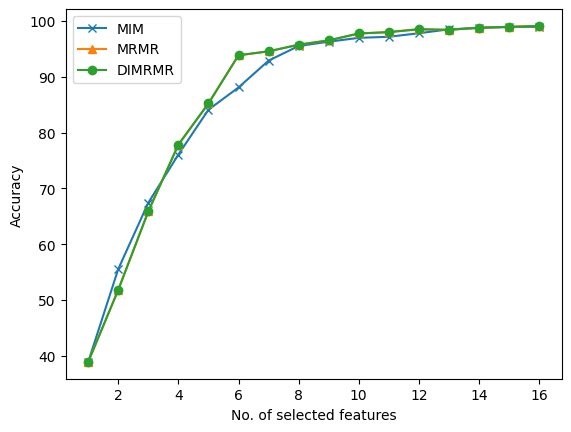

In [55]:
import matplotlib.pyplot as plt


xpoints = np.array(all_columns)
ypoints = np.array(mim_accuracy_results)

plt.plot(xpoints, ypoints, marker='x', label='MIM')

ypoints = np.array(mrmr_accuracy_results)
plt.plot(xpoints, ypoints, marker='^', label = 'MRMR')

ypoints = np.array(dimrmr_accuracy_results)
plt.plot(xpoints, ypoints, marker='o', label = 'DIMRMR')

plt.xlabel("No. of selected features")
plt.ylabel("Accuracy")
# plt.title("accuracy performance")

plt.legend()
plt.show()

In [56]:
mim_accuracy_results = []
print('running on MIM')
for columns in all_columns:
    features = xk_mim[:columns]

    print(f'features using: {features}')
    curr_acc = selection_accurecy_KNN(features)
    print(curr_acc)
    mim_accuracy_results.append(curr_acc)
print(mim_accuracy_results)
mrmr_accuracy_results = []
print('running on MRMR')
for columns in all_columns:
    features = xk_mrmr[:columns]

    print(f'features using: {features}')
    curr_acc = selection_accurecy_KNN(features)
    print(curr_acc)
    mrmr_accuracy_results.append(curr_acc)
print(mrmr_accuracy_results)
dimrmr_accuracy_results = []
print('running on DIMRMR')
for columns in all_columns:
    features = xk_dimrmr[:columns]

    print(f'features using: {features}')
    curr_acc = selection_accurecy_KNN(features)
    print(curr_acc)
    dimrmr_accuracy_results.append(curr_acc)
print(dimrmr_accuracy_results)

running on MIM
features using: [13]
24.181214327074194
features using: [13, 15]
45.46060881793366
features using: [13, 15, 7]


64.53794358507736
features using: [13, 15, 7, 5]
75.82782695011996
features using: [13, 15, 7, 5, 9]
83.53342708247166
features using: [13, 15, 7, 5, 9, 11]
87.44564480105883
features using: [13, 15, 7, 5, 9, 11, 4]
91.76665563735627
features using: [13, 15, 7, 5, 9, 11, 4, 14]
94.5416411613864
features using: [13, 15, 7, 5, 9, 11, 4, 14, 1]
95.74232773595831
features using: [13, 15, 7, 5, 9, 11, 4, 14, 1, 3]
96.56117131276368
features using: [13, 15, 7, 5, 9, 11, 4, 14, 1, 3, 0]
96.92517991562578
features using: [13, 15, 7, 5, 9, 11, 4, 14, 1, 3, 0, 10]
97.98941186202335
features using: [13, 15, 7, 5, 9, 11, 4, 14, 1, 3, 0, 10, 8]
98.40799900736205
features using: [13, 15, 7, 5, 9, 11, 4, 14, 1, 3, 0, 10, 8, 6]
98.87197452229299
features using: [13, 15, 7, 5, 9, 11, 4, 14, 1, 3, 0, 10, 8, 6, 12]
99.05390851187029
features using: [13, 15, 7, 5, 9, 11, 4, 14, 1, 3, 0, 10, 8, 6, 12, 2]
99.1267433203739
[24.181214327074194, 45.46060881793366, 64.53794358507736, 75.82782695011996, 83.53342

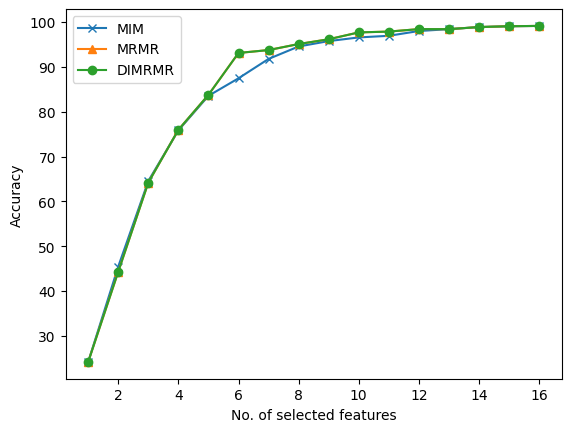

In [57]:
import matplotlib.pyplot as plt


xpoints = np.array(all_columns)
ypoints = np.array(mim_accuracy_results)

plt.plot(xpoints, ypoints, marker='x', label='MIM')

ypoints = np.array(mrmr_accuracy_results)
plt.plot(xpoints, ypoints, marker='^', label = 'MRMR')

ypoints = np.array(dimrmr_accuracy_results)
plt.plot(xpoints, ypoints, marker='o', label = 'DIMRMR')

plt.xlabel("No. of selected features")
plt.ylabel("Accuracy")
# plt.title("accuracy performance")

plt.legend()
plt.show()